In [1]:
%cd ..

c:\Users\c3_20\dev_nakagawa


C:\Users\c3_20\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

from src.util import make_player_df_from_playdf

pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)

In [3]:
data_dir = "data/unofficial/2023041506"
p_play = os.path.join(data_dir, "play.csv")
p_tracking = os.path.join(data_dir, "tracking.csv")
play_df = pd.read_csv(p_play, encoding="ansi")
tracking_df = pd.read_csv(p_tracking)

# play_df

In [4]:
play_df.head()

,試合ID,履歴No,試合状態ID,チームID,チーム名,選手ID,選手名,選手背番号,ポジションID,アクションID,アクション名,シリーズNo,ホームアウェイF,攻撃番号,流れID,ボールＸ,ボールＹ,攻撃方向,攻撃開始履歴No,攻撃終了履歴No,セル位置コード,距離,ハーフ開始相対時間,F_ゴール,F_アシスト,F_シュート,F_ボレーシュート,F_シュートアシスト,F_トラップ,F_ドリブル,F_パス,F_センタリング,F_スルーパス,F_クリア,F_スラークリア,F_カット,F_スラーカット,F_ブロック,F_スラーブロック,F_キャッチ,F_キーパークリア,F_キーパーブロック,F_ハンドクリア,F_ゴールキック,F_コーナーキック,F_直接フリーキック,F_間接フリーキック,F_ペナルティキック,F_スローイン,F_ファウル,F_被ファウル,F_オフサイド,F_イエローカード,F_レッドカード,F_速攻,F_遅攻,F_中央攻撃,F_右攻め,F_左攻め,F_ボールロスト,F_ボールゲイン,F_リリース,F_レシーブ,F_ファーストタッチ,F_展開,F_こぼれ球奪取,F_バックパス,F_ペナルティエリア進入,F_ペナルティ脇進入,F_30mライン進入,F_バイタルエリア進入,F_プライマリエリア進入,F_シュート関係数,F_ゴール関係数,F_サイドチェンジ１,F_サイドチェンジ２,F_サイドチェンジ３,F_サイドチェンジ中継,F_ボールタッチ,F_一プレイ,F_プレー数１,F_プレー数２,F_プレー数３,F_成功,F_点差,B1_履歴No,B1_チームID,B1_選手ID,B1_アクションID,B1_ホームアウェイF,B1_ボールＸ,B1_ボールＹ,B1_攻撃方向,B1_シュート公式,B2_履歴No,B2_チームID,B2_選手ID,B2_アクションID,B2_ボールＸ,B2_ボールＹ,B2_攻撃方向,A1_履歴No,A1_ハーフ開始相対時間,A1_チームID,A1_選手ID,A1_アクションID,A1_ホームアウェイF,A1_ボールＸ,A1_ボールＹ,A1_攻撃方向,A1_ゴールF,A1_シュート公式,A2_履歴No,A2_チームID,A2_選手ID,A2_アクションID,A2_ボールＸ,A2_ボールＹ,A2_攻撃方向,F_スルー,F_フィード,F_タッチ,F_タックル,F_フリックオン,F_スーパープレー,F_ポスト・バー,F_クロス処理ミス,F_キーパーミス,ラストマンタックルF,クリアドオフザラインF,スマザーF,空中戦F,クロス触れたF,ミスヒットF,キャッチ難F,ファンブルF,スライディングF,成功・失敗F,相手選手ID,フィードID,スーパープレーID,部位ID,相手チームID,映像無しF,F_セーブ,F_PK与えた,相手GK選手ID,位置①,位置②,位置③,位置④,位置⑤,位置⑥,位置⑦,位置⑧,位置⑨,位置⑩,位置⑪,方向角度,方向①,方向②,方向③,方向④,方向⑤,方向⑥,方向特殊,方向特殊A,方向特殊B,方向特殊C,方向特殊D,タッチ種別,展開力,関係P,距離2,Insゴール,Insシュート,セットプレイF,時間,F_シュート公式,パスToWho,F_攻撃１,F_攻撃３,距離3,時間帯,受けプレイ,導くプレイ,キープランF,HOTZONE1-3,開始相対時間,献上プレイ,進入トライ,FKクイックスタート,詳細ポジションID,詳細ポジション名,空アクションF,HOTZONE3-1,HOTZONE2-3,HOTZONE4-6,HOTZONE6-9,HOTZONE3-3,HOTZONE3-3_Detail,HOTZONE3-2,HOTZONE4-6_Detail,HOTZONE5-6_Detail,Insシュート_raw,Insゴール_raw,フレーム番号
0,2023041506,1,1,0,NaN,0,NaN,NaN,0,1,前半開始,1,1,0,0,0.0,0.0,2,0,0,K07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0,10001,0,120,1622201,26,1,0.0,0.0,2,0,0,627900,120,1300052,29,46.5,-10.5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1503034,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,5,NaN,NaN,0,2,0,NaN,NaN,0,0,NaN,0,2,3,14,27,5,8,5,14,18,0,0,1445711
1,2023041506,10001,1,120,鹿島アントラーズ,1622201,荒木 遼太郎,10.0,3,26,キックオフ,2,1,1,9,0.0,0.0,2,10001,857700,K07,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,1,1,0.0,0.0,2,0,0,0,0,0,0.0,0.0,0,627900,1,120,1300052,29,1,46.5,-10.5,2,0,0,857700,120,1300052,40,-116.0,104.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,0,0,0,1503034,0,0,0,0,0,0,0,0,0,0,0,167.27,0,0,0,0,0,4,0,0,0,0,0,3,0,0,15.89,0,0,1,1,0,1300052,0,0,0,5,NaN,NaN,0,2,0,NaN,NaN,0,0,NaN,0,2,3,14,27,5,8,5,14,18,0,0,1445711
2,2023041506,627900,1,120,鹿島アントラーズ,1300052,植田 直通,55.0,2,29,ホームパス,2,1,1,0,46.5,-10.5,2,10001,857700,M07,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,10001,120,1622201,26,1,0.0,0.0,2,0,1,0,0,1,0.0,0.0,2,857700,5,120,1300052,40,1,-116.0,104.0,2,0,0,911799,136,800567,44,-84.5,104.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,0,0,0,1503034,0,0,0,0,0,0,0,0,0,0,0,324.83,0,0,0,0,0,3,0,0,0,0,0,1,0,0,66.26,0,0,0,4,0,0,0,0,0,5,NaN,NaN,0,2,1,NaN,NaN,0,0,NaN,0,2,4,15,34,5,8,5,15,18,0,0,1445756
3,2023041506,857700,1,120,鹿島アントラーズ,1300052,植田 直通,55.0,2,40,ボールアウト,2,1,1,0,-116.0,104.0,2,10001,857700,C14,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,627900,120,1300052,29,1,46.5,-10.5,2,0,10001,120,1622201,26,0.0,0.0,2,911799,15,136,800567,44,2,-84.5,104.0,1,0,0,1020449,136,1000640,75,-38.5,92.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,0,0,0,1503034,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,10,0,0,0,0,0,5,NaN,NaN,0,1,5,NaN,NaN,0,0,NaN,0,1,1,1,7,1,1,1,1,1,0,0,1445852
4,2023041506,911799,1,136,ヴィッセル神戸,800567,酒井 高徳,24.0,2,44,スローイン,3,2,2,9,-84.5,104.0,1,911799,1788147,E14,0,15,0,0,0,0,0,0,0,1,0

In [5]:
player_df = make_player_df_from_playdf(play_df)

In [6]:
play_df["アクション名"].unique()

array(['前半開始', 'キックオフ', 'ホームパス', 'ボールアウト', 'スローイン', 'フリックオン', 'トラップ',
       'タックル', 'アウェイパス', 'ブロック', 'ドリブル', 'ファウルする', 'ファウル受ける', '直接FK',
       'クリア', 'CK', 'シュート', 'クロス', 'キャッチ', 'フィード', 'スルーパス', 'タッチ', 'GK',
       '試合中断(試合中)', 'ドロップボール', 'ハンドクリア'], dtype=object)

<Axes: title={'center': 'Series No. Count'}, ylabel='シリーズNo'>

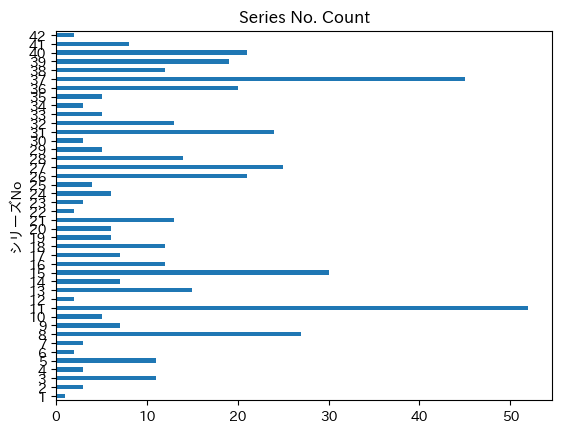

In [7]:
play_df.groupby("シリーズNo").size().plot(kind="barh", title="Series No. Count")

<Axes: title={'center': '選手数'}, ylabel='シリーズNo'>

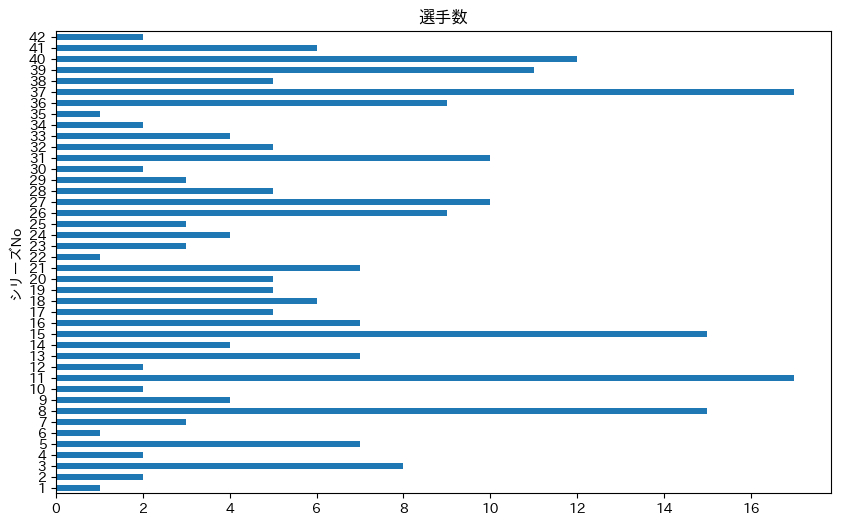

In [8]:
play_df.groupby("シリーズNo")["選手ID"].nunique().plot(
    kind="barh", figsize=(10, 6), title="選手数"
)

In [9]:
play_df.nunique()

試合ID                   1
履歴No                 495
試合状態ID                 1
チームID                  3
チーム名                   2
                    ... 
HOTZONE4-6_Detail     24
HOTZONE5-6_Detail     30
Insシュート_raw            1
Insゴール_raw             1
フレーム番号               483
Length: 207, dtype: int64

# tracking_df

In [10]:
tracking_df.head()

,GameID,Frame,HA,SysTarget,No,X,Y,Speed
0,2023041506,1444962,1,10,2,2302,-58,0.0
1,2023041506,1444962,1,19,5,2019,-1458,0.0
2,2023041506,1444962,1,9,10,1148,396,0.0
3,2023041506,1444962,1,5,13,842,-1731,0.0
4,2023041506,1444962,1,25,14,1839,-124,0.0


In [11]:
tracking_df.describe()

,GameID,Frame,HA,SysTarget,No,X,Y,Speed
count,1.026124e+06,1.026124e+06,1.026124e+06,1.026124e+06,1.026124e+06,1.026124e+06,1.026124e+06,1.026124e+06
mean,2.023042e+09,1.467836e+06,1.470610e+00,1.369309e+01,1.756058e+01,4.560065e+02,-7.364936e+01,6.076424e+00
std,0.000000e+00,1.320766e+04,5.368789e-01,7.899405e+00,1.232715e+01,2.738475e+03,1.482672e+03,5.282421e+00
min,2.023042e+09,1.444962e+06,0.000000e+00,0.000000e+00,0.000000e+00,-5.550000e+03,-3.927000e+03,0.000000e+00
25%,2.023042e+09,1.456373e+06,1.000000e+00,7.000000e+00,1.000000e+01,-1.561000e+03,-9.870000e+02,2.270000e+00
50%,2.023042e+09,1.467836e+06,1.000000e+00,1.400000e+01,1.500000e+01,4.950000e+02,-7.500000e+01,4.620000e+00
75%,2.023042e+09,1.479276e+06,2.000000e+00,2.000000e+01,2.300000e+01,2.775000e+03,7.950000e+02,8.750000e+00
max,2.023042e+09,1.490697e+06,2.000000e+00,2.900000e+01,5.500000e+01,5.550000e+03,3.758000e+03,3.245000e+01


<Axes: xlabel='X', ylabel='Y'>

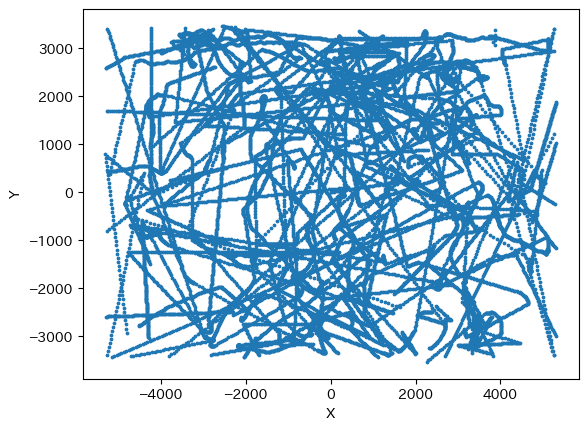

In [12]:
tracking_df.loc[tracking_df["No"] == 0].plot.scatter(x="X", y="Y", s=3)

In [13]:
len(tracking_df.loc[tracking_df["No"] == 0]) / tracking_df[
    "Frame"
].nunique(), tracking_df["Frame"].nunique()

(0.43864789225118067, 45736)

In [14]:
tracking_df.loc[tracking_df["No"] == 0].describe()

,GameID,Frame,HA,SysTarget,No,X,Y,Speed
count,2.006200e+04,2.006200e+04,20062.0,20062.0,20062.0,20062.000000,20062.000000,20062.0
mean,2.023042e+09,1.468016e+06,0.0,0.0,0.0,138.518842,224.714734,0.0
std,0.000000e+00,1.352764e+04,0.0,0.0,0.0,2588.791412,2000.156106,0.0
min,2.023042e+09,1.445711e+06,0.0,0.0,0.0,-5304.000000,-3545.000000,0.0
25%,2.023042e+09,1.455078e+06,0.0,0.0,0.0,-1891.000000,-1431.000000,0.0
50%,2.023042e+09,1.469324e+06,0.0,0.0,0.0,247.000000,303.500000,0.0
75%,2.023042e+09,1.480878e+06,0.0,0.0,0.0,2224.000000,2009.750000,0.0
max,2.023042e+09,1.490697e+06,0.0,0.0,0.0,5309.000000,3462.000000,0.0


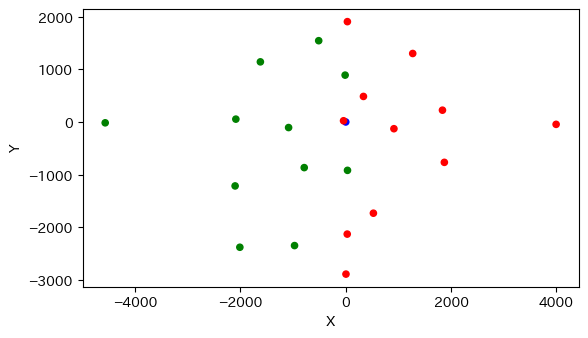

In [15]:
cmap = {0: "b", 1: "r", 2: "g"}  # Ball  # Home team  # Away team

# 特定フレームのデータ抽出
ini_frame = int(tracking_df.loc[tracking_df["No"] == 0, "Frame"].iloc[0])
tracking_framedf = tracking_df.loc[tracking_df["Frame"] == ini_frame]

# HA列の値を色にマッピング
colors = tracking_framedf["HA"].map(cmap)

# 散布図描画
tracking_framedf.plot.scatter(x="X", y="Y", color=colors)
plt.gca().set_aspect("equal")  # オプション：縦横比を同じにする
plt.show()

In [16]:
player_df

,ホームアウェイF,選手背番号,ポジションID,選手名,ポジション
0,1,29,1,早川 友基,GK
1,1,55,2,植田 直通,DF
2,1,22,2,広瀬 陸斗,DF
3,1,2,2,安西 幸輝,DF
4,1,5,2,関川 郁万,DF
5,1,10,3,荒木 遼太郎,MF
6,1,21,3,ディエゴ ピトゥカ,MF
7,1,14,3,樋口 雄太,MF
8,1,40,4,鈴木 優磨,FW
9,1,27,4,松村 優太,FW


In [17]:
tracking_framedf

,GameID,Frame,HA,SysTarget,No,X,Y,Speed
16348,2023041506,1445711,0,0,0,0,0,0.0
16349,2023041506,1445711,1,19,2,525,-1733,0.0
16350,2023041506,1445711,1,8,5,1873,-767,0.0
16351,2023041506,1445711,1,20,10,-42,23,0.0
16352,2023041506,1445711,1,5,13,4,-2890,0.0
16353,2023041506,1445711,1,9,14,336,485,0.0
16354,2023041506,1445711,1,25,21,915,-128,0.0
16355,2023041506,1445711,1,1,22,1272,1301,0.0
16356,2023041506,1445711,1,24,27,31,1906,0.0
16357,2023041506,1445711,1,22,29,3996,-45,0.0


In [18]:
def assosiate_player_detail_role(player_df, init_frame_tracking_df):
    player_df = player_df.copy()
    init_frame_tracking_df = init_frame_tracking_df.copy()

    tempdf = tracking_framedf.merge(
        player_df[["ホームアウェイF", "選手背番号", "ポジション", "ポジションID", "選手名"]],
        left_on=["HA", "No"],
        right_on=["ホームアウェイF", "選手背番号"],
        how="left",
    )
    tempdf = tempdf.loc[tempdf["HA"] != 0]

    new_row = list()
    for ha, ha_df in tempdf.groupby("HA"):
        for pos, pos_df in ha_df.groupby("ポジション"):
            if pos == "DF" and len(pos_df) == 4:
                pos_df.loc[pos_df["Y"].idxmax(), "ポジション"] = "LB"
                pos_df.loc[pos_df["Y"].idxmin(), "ポジション"] = "RB"

            elif pos == "MF" and len(pos_df) >= 3:
                pos_df.loc[pos_df["Y"].idxmax(), "ポジション"] = "LM"
                pos_df.loc[pos_df["Y"].idxmin(), "ポジション"] = "RM"

            new_row.append(pos_df)
    new_df = pd.concat(new_row, ignore_index=True)
    new_player_df = new_df[["ホームアウェイF", "選手背番号", "ポジションID", "選手名", "ポジション"]]
    new_player_df[["ホームアウェイF", "選手背番号", "ポジションID"]] = new_player_df[
        ["ホームアウェイF", "選手背番号", "ポジションID"]
    ].map(int)
    return new_player_df

In [19]:
assosiate_player_detail_role(player_df, tracking_framedf)

C:\Users\c3_20\AppData\Local\Temp\ipykernel_47512\776402146.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_player_df[["ホームアウェイF", "選手背番号", "ポジションID"]] = new_player_df[


,ホームアウェイF,選手背番号,ポジションID,選手名,ポジション
0,1,2,2,安西 幸輝,RB
1,1,5,2,関川 郁万,DF
2,1,22,2,広瀬 陸斗,LB
3,1,55,2,植田 直通,DF
4,1,13,4,知念 慶,FW
5,1,27,4,松村 優太,FW
6,1,40,4,鈴木 優磨,FW
7,1,29,1,早川 友基,GK
8,1,10,3,荒木 遼太郎,MF
9,1,14,3,樋口 雄太,LM


In [20]:
player_df

,ホームアウェイF,選手背番号,ポジションID,選手名,ポジション
0,1,29,1,早川 友基,GK
1,1,55,2,植田 直通,DF
2,1,22,2,広瀬 陸斗,DF
3,1,2,2,安西 幸輝,DF
4,1,5,2,関川 郁万,DF
5,1,10,3,荒木 遼太郎,MF
6,1,21,3,ディエゴ ピトゥカ,MF
7,1,14,3,樋口 雄太,MF
8,1,40,4,鈴木 優磨,FW
9,1,27,4,松村 優太,FW


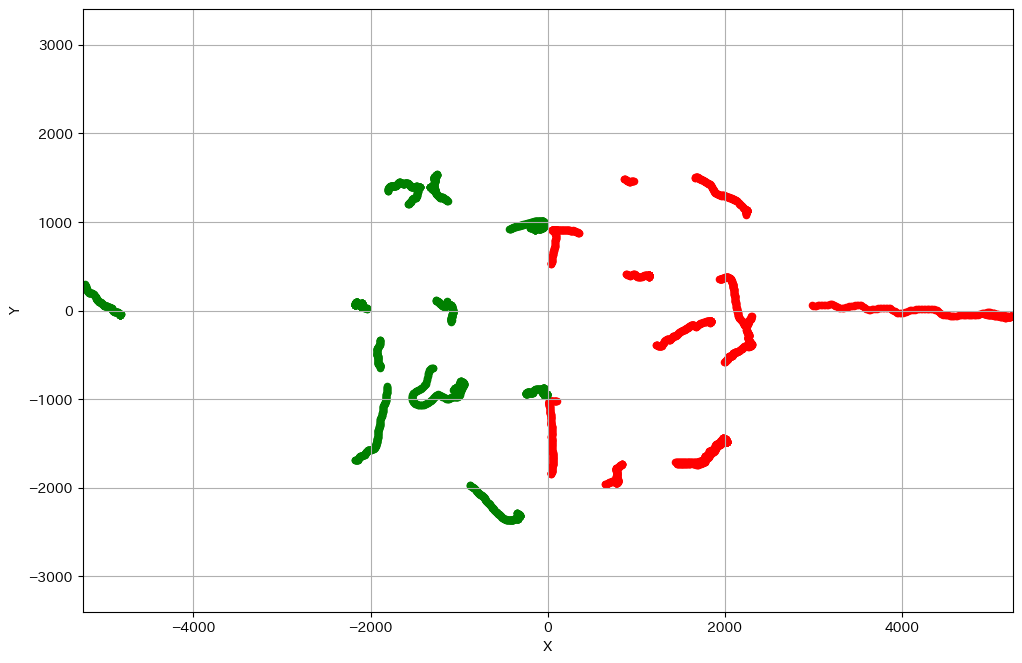

In [21]:
import matplotlib.pyplot as plt

cmap = {0: "b", 1: "r", 2: "g"}  # Ball  # Home team  # Away team
fig, ax = plt.subplots(figsize=(12, 12))

for frame_id, tracking_framedf in tracking_df.iloc[:5000].groupby("Frame"):
    for type_ in tracking_framedf["HA"].unique():
        color = cmap.get(type_, "k")
        df_sub = tracking_framedf[tracking_framedf["HA"] == type_]
        df_sub.plot.scatter(x="X", y="Y", c=color, ax=ax)
    ax.set_xlim(-5250.0, 5250.0)
    ax.set_ylim(-3400.0, 3400.0)
    ax.set_aspect("equal")
    plt.grid(True)

plt.show()

In [22]:
tracking_framedf = tracking_df.loc[
    tracking_df["Frame"] == tracking_df["Frame"].unique()[210]
]
tracking_framedf

,GameID,Frame,HA,SysTarget,No,X,Y,Speed
4515,2023041506,1445172,1,10,2,2002,374,0.0
4516,2023041506,1445172,1,19,5,1573,-1715,0.0
4517,2023041506,1445172,1,9,10,999,394,0.0
4518,2023041506,1445172,1,5,13,754,-1924,0.0
4519,2023041506,1445172,1,25,14,1294,-388,0.0
4520,2023041506,1445172,1,23,21,1578,-1734,0.0
4521,2023041506,1445172,1,8,22,2041,-529,0.0
4522,2023041506,1445172,1,24,27,962,1465,0.0
4523,2023041506,1445172,1,22,29,5012,-52,0.0
4524,2023041506,1445172,1,21,40,48,-1773,0.0


In [23]:
shoot_frames_df = play_df.loc[play_df["F_シュート"] == 1]
shoot_frames = shoot_frames_df["フレーム番号"].unique().tolist()
shoot_frames

[1448699, 1451486, 1459164, 1463761, 1463820, 1476060, 1480859, 1485844]

In [39]:
shoot_frames_df[['選手名', 'フレーム番号']]

,選手名,フレーム番号
19,大迫 勇也,1448699
51,井出 遥也,1451486
170,鈴木 優磨,1459164
211,知念 慶,1463761
213,広瀬 陸斗,1463820
316,大迫 勇也,1476060
361,大迫 勇也,1480859
429,初瀬 亮,1485844


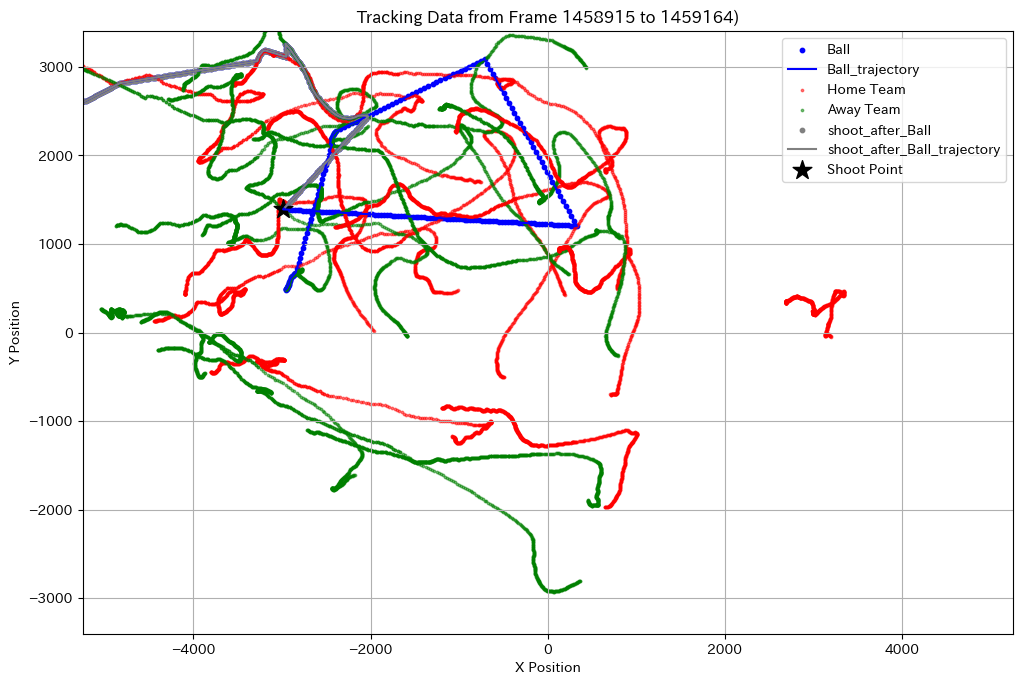

In [25]:
target_frame = 1459164
fps = 25
buf_time = 10  # 秒
buf_frame = int(fps * buf_time)

cmap = {0: "b", 1: "r", 2: "g"}  # Ball  # Home team  # Away team
ha_dict = {0: "Ball", 1: "Home Team", 2: "Away Team"}

fig, ax = plt.subplots(figsize=(12, 12))

filtered_tracking_df = tracking_df[
    (tracking_df["Frame"] > target_frame - buf_frame)
    & (tracking_df["Frame"] < target_frame + buf_frame)
]

for ha, group_df in filtered_tracking_df.groupby("HA", sort=False):
    color = cmap.get(ha, "k")
    label = ha_dict.get(ha, f"Type {ha}")
    alplha = 0.5 if ha != 0 else 1.0
    if ha == 0:
        ax.scatter(
            group_df["X"], group_df["Y"], c=color, label=label, s=10, alpha=alplha
        )
        ax.plot(
            group_df["X"],
            group_df["Y"],
            c=color,
            label=f"{label}_trajectory",
            linewidth=1.5,
            alpha=alplha,
        )
    else:
        ax.scatter(
            group_df["X"], group_df["Y"], c=color, label=label, s=3, alpha=alplha
        )

filtered_tracking_df = tracking_df[
    (tracking_df["Frame"] > target_frame)
    & (tracking_df["Frame"] < target_frame + buf_frame)
]

for ha, group_df in filtered_tracking_df.groupby("HA", sort=False):
    color = cmap.get(ha, "k")
    label = ha_dict.get(ha, f"Type {ha}")
    alplha = 0.5 if ha != 0 else 1.0
    if ha == 0:
        ax.scatter(
            group_df["X"],
            group_df["Y"],
            c="gray",
            label=f"shoot_after_{label}",
            s=10,
            alpha=alplha,
        )
        ax.plot(
            group_df["X"],
            group_df["Y"],
            c="gray",
            label=f"shoot_after_{label}_trajectory",
            linewidth=1.5,
            alpha=alplha,
        )
    else:
        ax.scatter(group_df["X"], group_df["Y"], c=color, s=3, alpha=alplha)

tracking_df[
    (tracking_df["Frame"] == target_frame) & (tracking_df["No"] == 0)
].plot.scatter(
    x="X", y="Y", s=200, marker="*", color="k", ax=ax, label="Shoot Point"
)

plt.xlim(-5250.0, 5250.0)
plt.ylim(-3400.0, 3400.0)
plot_title_start_frame = (target_frame - buf_frame) + 1
plot_title_end_frame = (target_frame + buf_frame) - 1
plt.title(f"Tracking Data from Frame {plot_title_start_frame} to {target_frame})")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.gca().set_aspect("equal")  # 縦横比を同じにする
plt.legend()
plt.show()

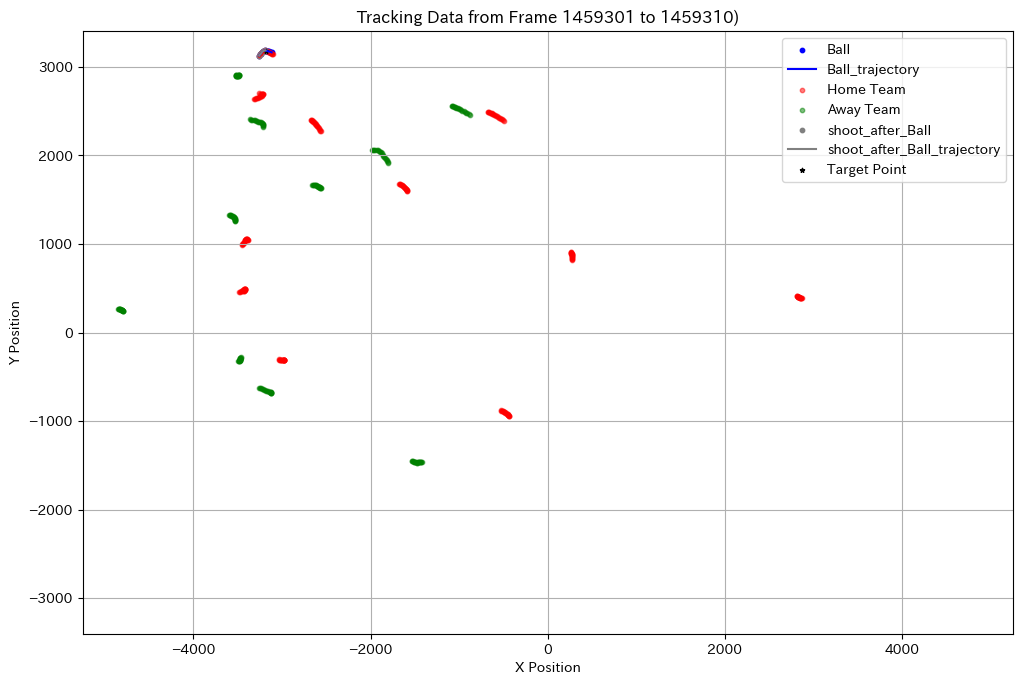

In [26]:
target_frame = 1459310
fps = 25
buf_frame = 10

cmap = {0: "b", 1: "r", 2: "g"}  # Ball  # Home team  # Away team
ha_dict = {0: "Ball", 1: "Home Team", 2: "Away Team"}

fig, ax = plt.subplots(figsize=(12, 12))

filtered_tracking_df = tracking_df[
    (tracking_df["Frame"] > target_frame - buf_frame)
    & (tracking_df["Frame"] < target_frame + buf_frame)
]

for ha, group_df in filtered_tracking_df.groupby("HA", sort=False):
    color = cmap.get(ha, "k")
    label = ha_dict.get(ha, f"Type {ha}")
    alplha = 0.5 if ha != 0 else 1.0
    if ha == 0:
        ax.scatter(
            group_df["X"], group_df["Y"], c=color, label=label, s=10, alpha=alplha
        )
        ax.plot(
            group_df["X"],
            group_df["Y"],
            c=color,
            label=f"{label}_trajectory",
            linewidth=1.5,
            alpha=alplha,
        )
    else:
        ax.scatter(
            group_df["X"], group_df["Y"], c=color, label=label, s=10, alpha=alplha
        )

filtered_tracking_df = tracking_df[
    (tracking_df["Frame"] > target_frame)
    & (tracking_df["Frame"] < target_frame + buf_frame)
]

for ha, group_df in filtered_tracking_df.groupby("HA", sort=False):
    color = cmap.get(ha, "k")
    label = ha_dict.get(ha, f"Type {ha}")
    alplha = 0.5 if ha != 0 else 1.0
    if ha == 0:
        ax.scatter(
            group_df["X"],
            group_df["Y"],
            c="gray",
            label=f"shoot_after_{label}",
            s=10,
            alpha=alplha,
        )
        ax.plot(
            group_df["X"],
            group_df["Y"],
            c="gray",
            label=f"shoot_after_{label}_trajectory",
            linewidth=1.5,
            alpha=alplha,
        )
    else:
        ax.scatter(group_df["X"], group_df["Y"], c=color, s=3, alpha=alplha)

tracking_df[
    (tracking_df["Frame"] == target_frame) & (tracking_df["No"] == 0)
].plot.scatter(
    x="X", y="Y", s=10, marker="*", color="k", ax=ax, label="Target Point"
)

plt.xlim(-5250.0, 5250.0)
plt.ylim(-3400.0, 3400.0)
plot_title_start_frame = (target_frame - buf_frame) + 1
plot_title_end_frame = (target_frame + buf_frame) - 1
plt.title(f"Tracking Data from Frame {plot_title_start_frame} to {target_frame})")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.gca().set_aspect("equal")  # 縦横比を同じにする
plt.legend()
plt.show()

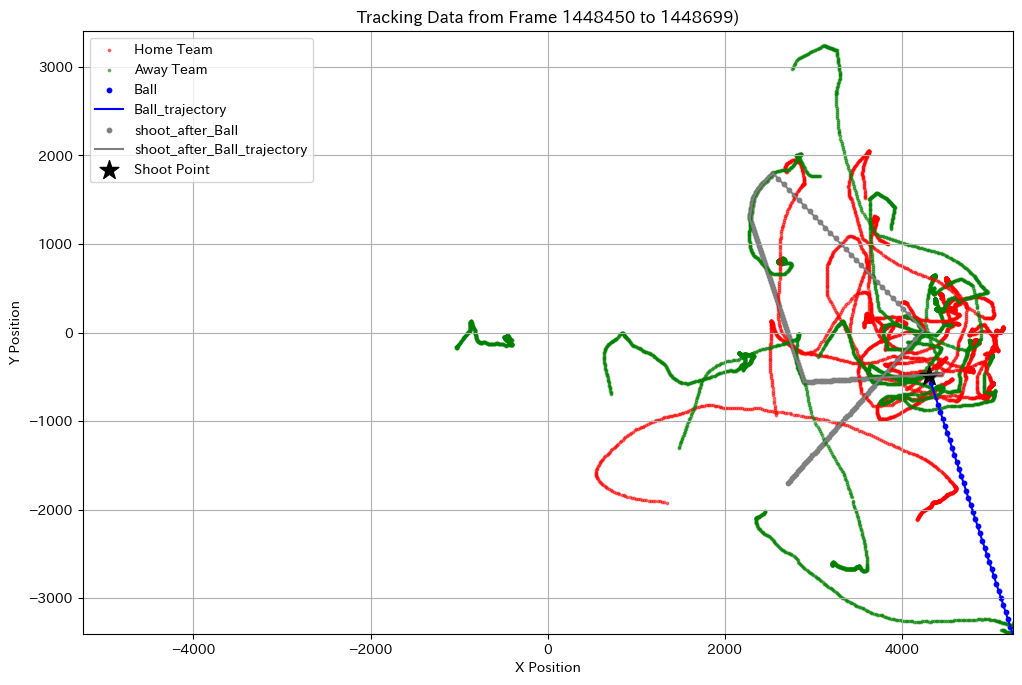

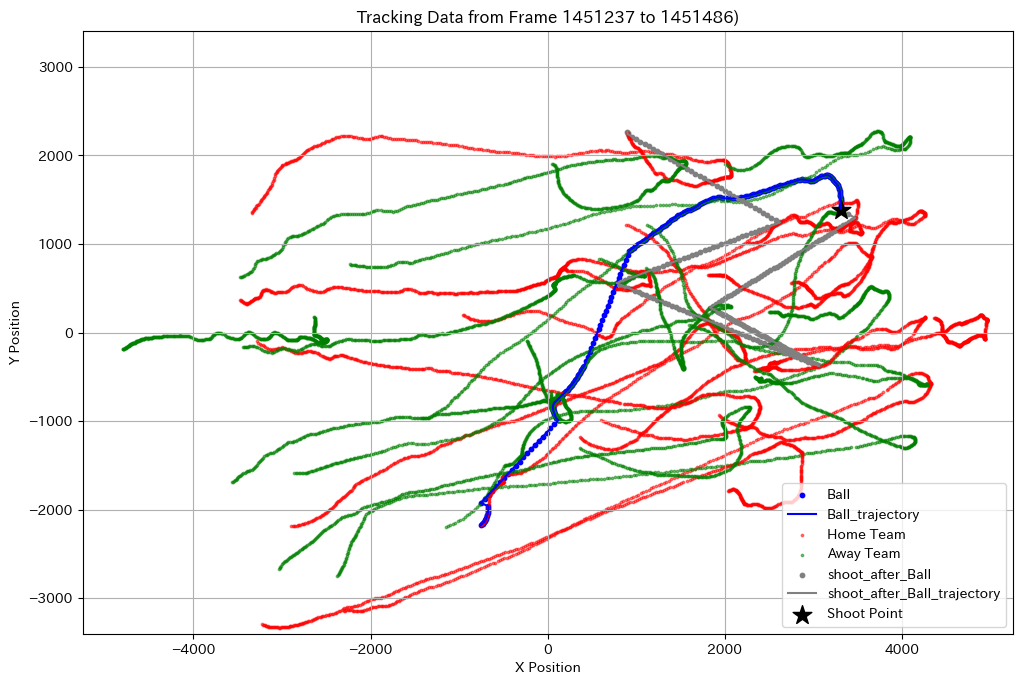

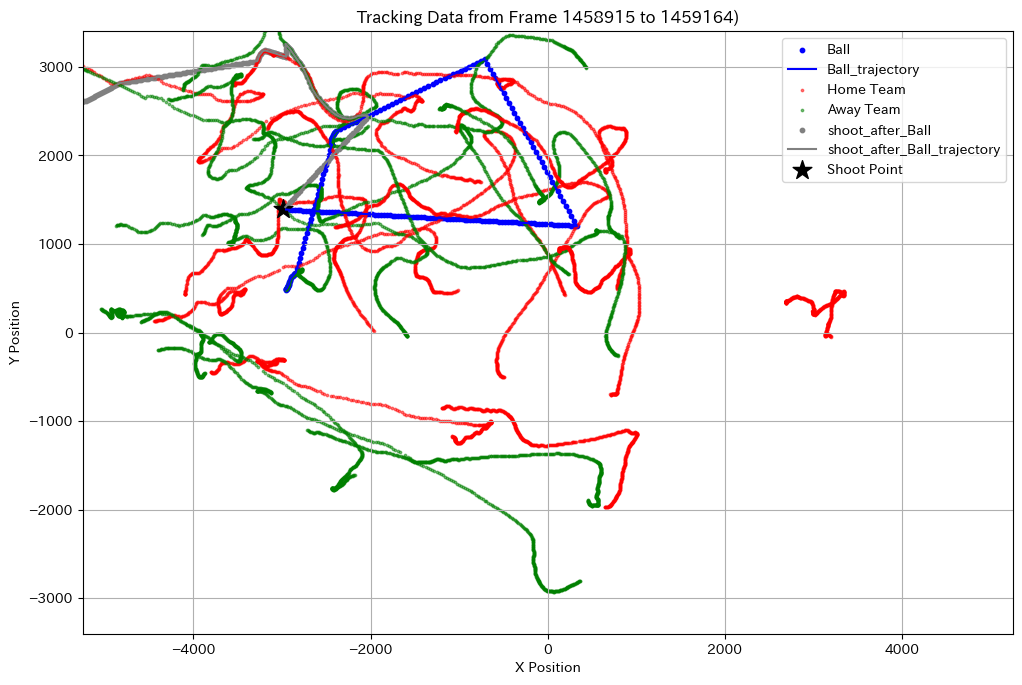

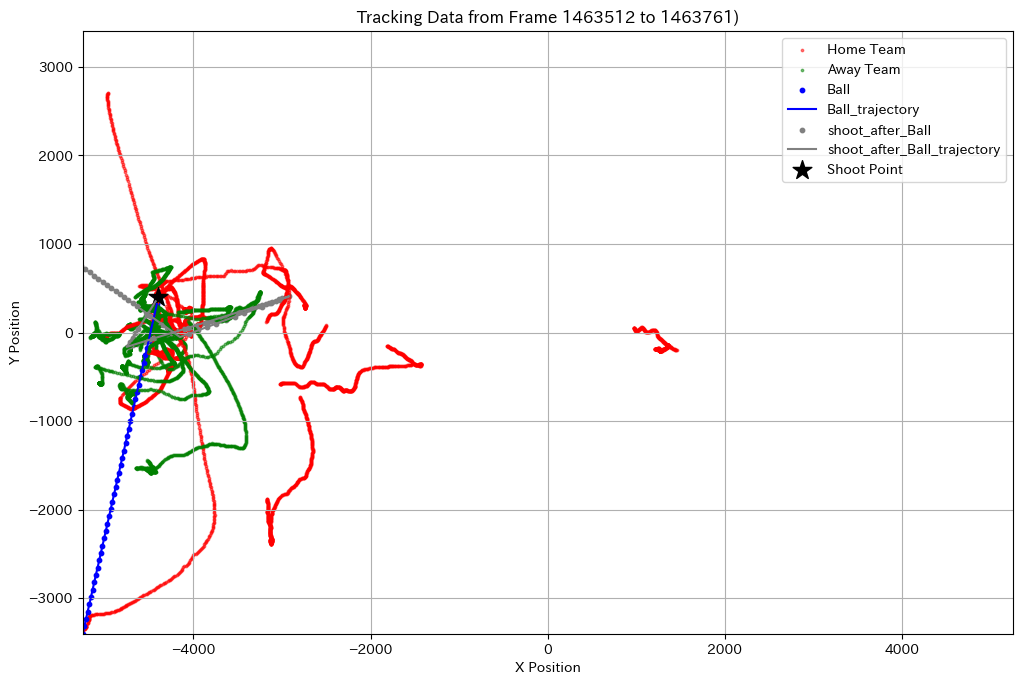

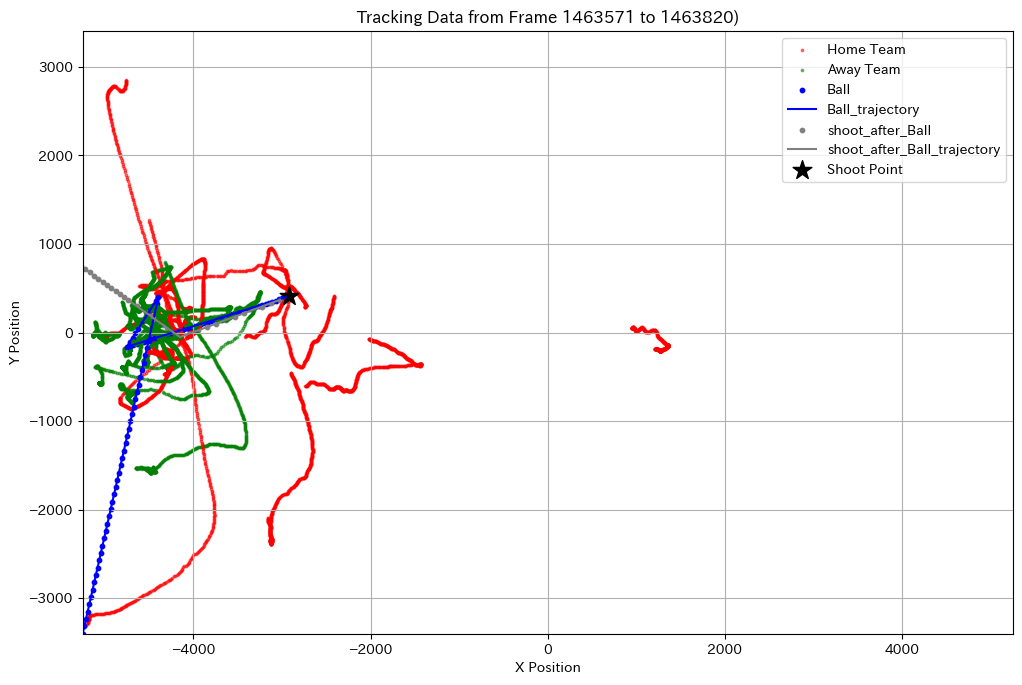

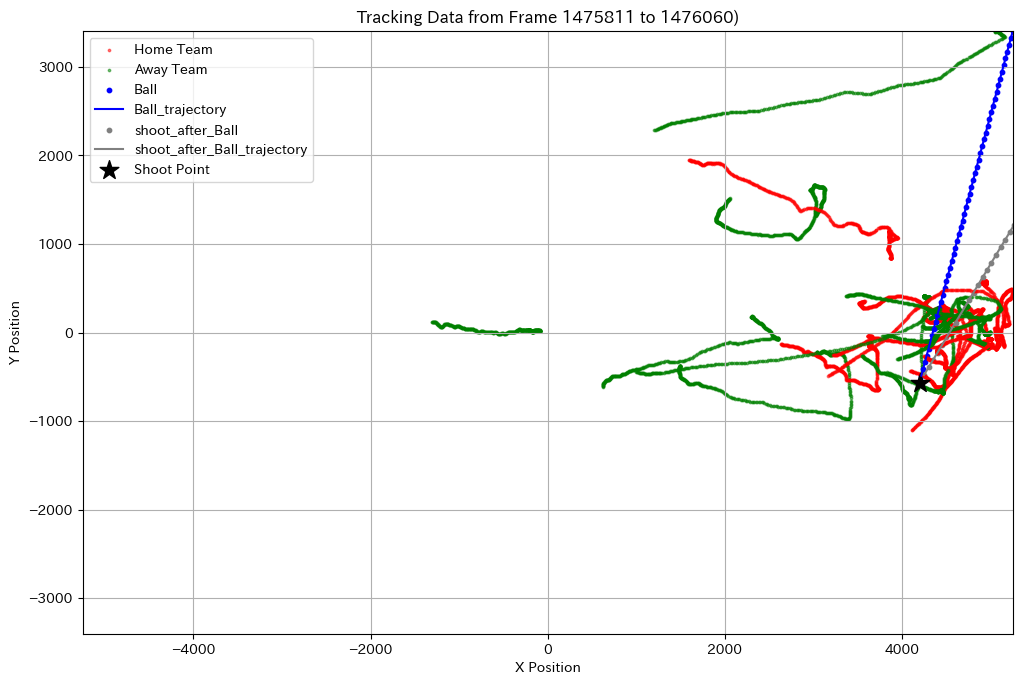

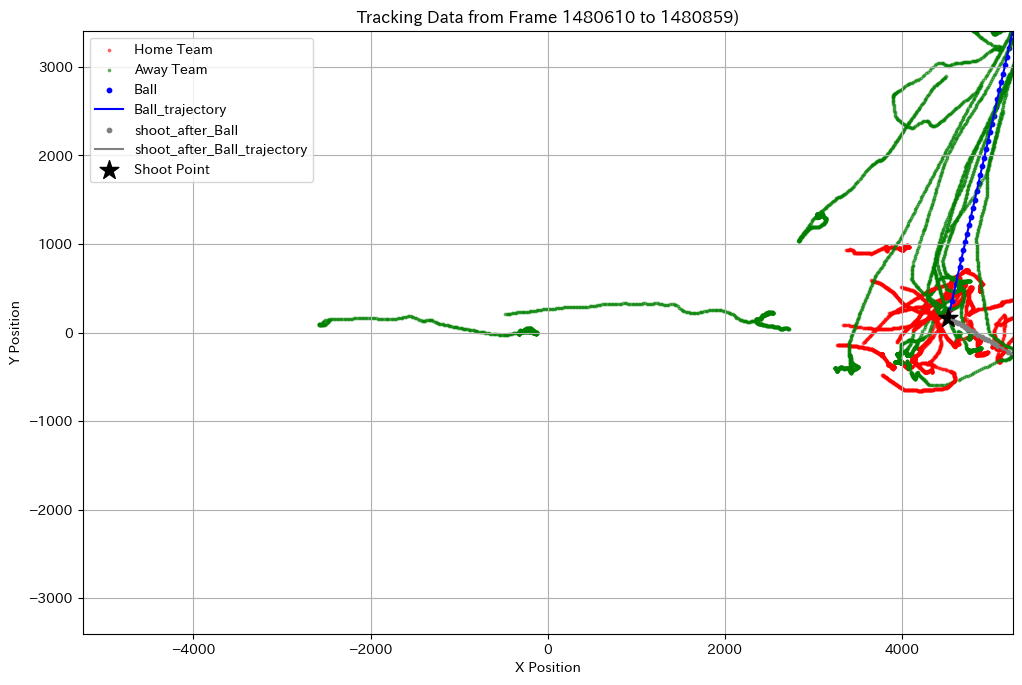

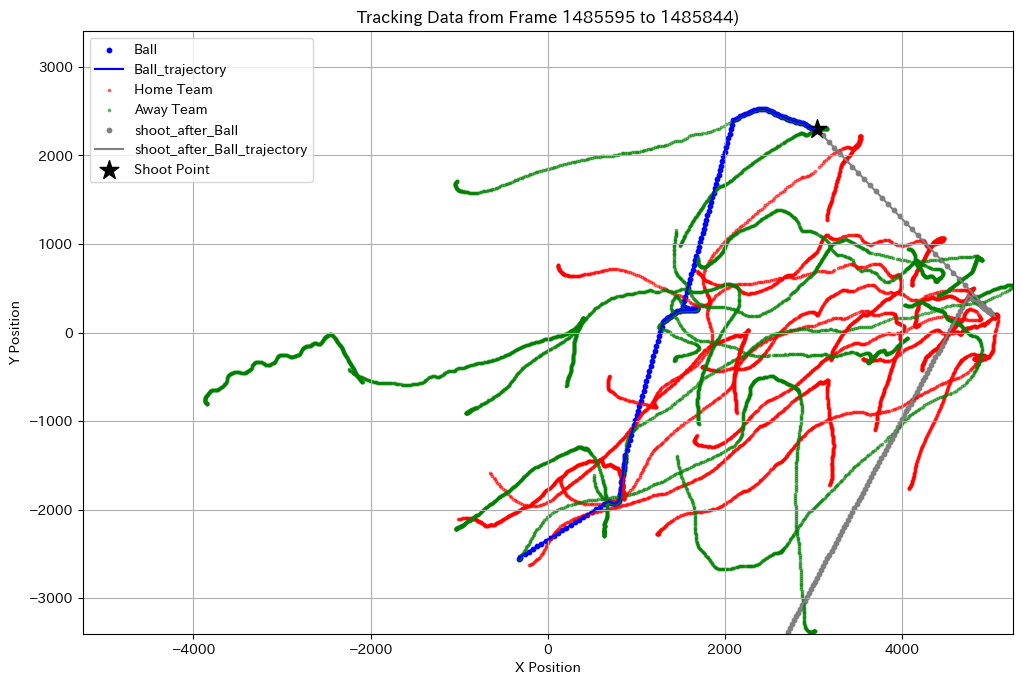

In [ ]:
for shoot_frame in shoot_frames:
    fps = 25
    buf_time = 10  # 秒
    buf_frame = int(fps * buf_time)

    cmap = {0: "b", 1: "r", 2: "g"}  # Ball  # Home team  # Away team
    ha_dict = {0: "Ball", 1: "Home Team", 2: "Away Team"}

    fig, ax = plt.subplots(figsize=(12, 12))

    filtered_tracking_df = tracking_df[
        (tracking_df["Frame"] > shoot_frame - buf_frame)
        & (tracking_df["Frame"] < shoot_frame)
    ]

    for ha, group_df in filtered_tracking_df.groupby("HA", sort=False):
        color = cmap.get(ha, "k")
        label = ha_dict.get(ha, f"Type {ha}")
        alplha = 0.5 if ha != 0 else 1.0
        if ha == 0:
            ax.scatter(
                group_df["X"], group_df["Y"], c=color, label=label, s=10, alpha=alplha
            )
            ax.plot(
                group_df["X"],
                group_df["Y"],
                c=color,
                label=f"{label}_trajectory",
                linewidth=1.5,
                alpha=alplha,
            )
        else:
            ax.scatter(
                group_df["X"], group_df["Y"], c=color, label=label, s=3, alpha=alplha
            )

    filtered_tracking_df = tracking_df[
        (tracking_df["Frame"] > shoot_frame)
        & (tracking_df["Frame"] < shoot_frame + buf_frame)
    ]

    for ha, group_df in filtered_tracking_df.groupby("HA", sort=False):
        color = cmap.get(ha, "k")
        label = ha_dict.get(ha, f"Type {ha}")
        alplha = 0.5 if ha != 0 else 1.0
        if ha == 0:
            ax.scatter(
                group_df["X"],
                group_df["Y"],
                c="gray",
                label=f"shoot_after_{label}",
                s=10,
                alpha=alplha,
            )
            ax.plot(
                group_df["X"],
                group_df["Y"],
                c="gray",
                label=f"shoot_after_{label}_trajectory",
                linewidth=1.5,
                alpha=alplha,
            )
        else:
            ax.scatter(group_df["X"], group_df["Y"], c=color, s=3, alpha=alplha)

    tracking_df[
        (tracking_df["Frame"] == shoot_frame) & (tracking_df["No"] == 0)
    ].plot.scatter(
        x="X", y="Y", s=200, marker="*", color="k", ax=ax, label="Shoot Point"
    )

    plt.xlim(-5250.0, 5250.0)
    plt.ylim(-3400.0, 3400.0)
    plot_title_start_frame = (shoot_frame - buf_frame) + 1
    plot_title_end_frame = (shoot_frame + buf_frame) - 1
    plt.title(f"Tracking Data from Frame {plot_title_start_frame} to {shoot_frame})")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.grid(True)
    plt.gca().set_aspect("equal")  # 縦横比を同じにする
    plt.legend()
    plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_pitch(ax, pitch_color="#228B22", line_color="white"):
    """
    指定されたAxesオブジェクトにサッカーピッチを描画する。
    ピッチ寸法: 105m x 68m (座標単位: 100倍)
    """
    # ピッチ寸法定義 (単位: cm)
    pitch_len_x, pitch_wid_y = 10500, 6800
    half_len_x, half_wid_y = pitch_len_x / 2, pitch_wid_y / 2
    goal_area_len_x, goal_area_wid_y = 550, 1832
    penalty_area_len_x, penalty_area_wid_y = 1650, 4032
    penalty_spot_dist = 1100
    center_circle_radius = 915
    corner_radius = 100

    # ピッチ背景
    ax.set_facecolor(pitch_color)

    # 外枠とハーフウェイライン
    ax.add_patch(patches.Rectangle((-half_len_x, -half_wid_y), pitch_len_x, pitch_wid_y,
                                     edgecolor=line_color, facecolor='none', lw=2))
    ax.plot([0, 0], [-half_wid_y, half_wid_y], color=line_color, lw=2)

    # センターサークルとセンターマーク
    ax.add_patch(patches.Circle((0, 0), center_circle_radius,
                                  edgecolor=line_color, facecolor='none', lw=2))
    ax.add_patch(patches.Circle((0, 0), 50, color=line_color))

    # --- 修正箇所: 左右のエリアを個別に描画 ---
    # ホーム側（左側）のエリア描画
    ax.add_patch(patches.Rectangle((-half_len_x, -penalty_area_wid_y / 2),
                                     penalty_area_len_x, penalty_area_wid_y,
                                     edgecolor=line_color, facecolor='none', lw=2))
    ax.add_patch(patches.Rectangle((-half_len_x, -goal_area_wid_y / 2),
                                     goal_area_len_x, goal_area_wid_y,
                                     edgecolor=line_color, facecolor='none', lw=2))
    ax.add_patch(patches.Circle((-half_len_x + penalty_spot_dist, 0), 30, color=line_color))
    angle_l = np.degrees(np.arccos((penalty_area_len_x - penalty_spot_dist) / center_circle_radius))
    ax.add_patch(patches.Arc((-half_len_x + penalty_spot_dist, 0),
                               width=center_circle_radius * 2, height=center_circle_radius * 2,
                               theta1=360 - angle_l, theta2=angle_l,
                               edgecolor=line_color, facecolor='none', lw=2))

    # アウェイ側（右側）のエリア描画
    ax.add_patch(patches.Rectangle((half_len_x - penalty_area_len_x, -penalty_area_wid_y / 2),
                                     penalty_area_len_x, penalty_area_wid_y,
                                     edgecolor=line_color, facecolor='none', lw=2))
    ax.add_patch(patches.Rectangle((half_len_x - goal_area_len_x, -goal_area_wid_y / 2),
                                     goal_area_len_x, goal_area_wid_y,
                                     edgecolor=line_color, facecolor='none', lw=2))
    ax.add_patch(patches.Circle((half_len_x - penalty_spot_dist, 0), 30, color=line_color))
    angle_r = np.degrees(np.arccos((penalty_area_len_x - penalty_spot_dist) / center_circle_radius))
    ax.add_patch(patches.Arc((half_len_x - penalty_spot_dist, 0),
                               width=center_circle_radius * 2, height=center_circle_radius * 2,
                               theta1=180 - angle_r, theta2=180 + angle_r,
                               edgecolor=line_color, facecolor='none', lw=2))
    # --- 修正ここまで ---

    # コーナーアーク
    ax.add_patch(patches.Arc((-half_len_x, -half_wid_y), corner_radius*2, corner_radius*2, theta1=0, theta2=90, edgecolor=line_color, lw=2))
    ax.add_patch(patches.Arc((-half_len_x, half_wid_y), corner_radius*2, corner_radius*2, theta1=270, theta2=360, edgecolor=line_color, lw=2))
    ax.add_patch(patches.Arc((half_len_x, -half_wid_y), corner_radius*2, corner_radius*2, theta1=90, theta2=180, edgecolor=line_color, lw=2))
    ax.add_patch(patches.Arc((half_len_x, half_wid_y), corner_radius*2, corner_radius*2, theta1=180, theta2=270, edgecolor=line_color, lw=2))

    ax.axis('off')

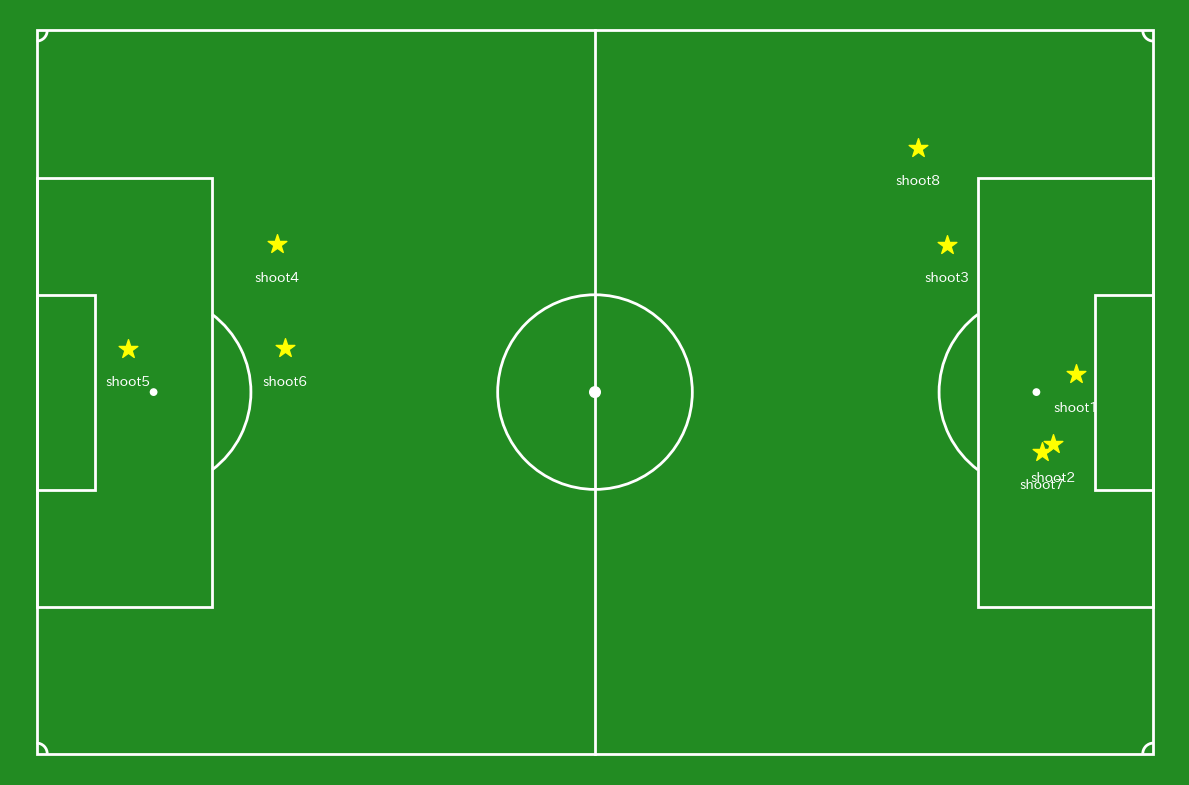

In [38]:
fps = 25
buf_time = 10  # 秒
buf_frame = int(fps * buf_time)

cmap = {0: "b", 1: "r", 2: "g"}  # Ball  # Home team  # Away team
ha_dict = {0: "Ball", 1: "Home Team", 2: "Away Team"}

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor("#228B22") # 図全体の背景色

# サッカーピッチの描画
draw_pitch(ax)

shoot_frame_dict = {
    'shoot1': 1480859,
    'shoot2': 1448699,
    'shoot3': 1451486,
    'shoot4': 1459164,
    'shoot5': 1463761,
    'shoot6': 1463820,
    'shoot7': 1476060,
    'shoot8': 1485844,
}

for shoot_name, shoot_frame in shoot_frame_dict.items():
    shoot_point_df = tracking_df[
        (tracking_df["Frame"] == shoot_frame) & (tracking_df["No"] == 0)
    ]
    if not shoot_point_df.empty:
        x_pos = shoot_point_df["X"].iloc[0]
        y_pos = shoot_point_df["Y"].iloc[0]
        
        # マーカー（星印）をプロット
        ax.scatter(x_pos, y_pos, s=200, marker="*", color="yellow", zorder=3)
        
        # テキスト（シュート名）をプロット
        ax.text(x_pos, y_pos - 250, shoot_name,
                ha="center", va="top", fontsize=10, color="white", weight='bold')

ax.set_xlim(-5500, 5500)
ax.set_ylim(-3600, 3600)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

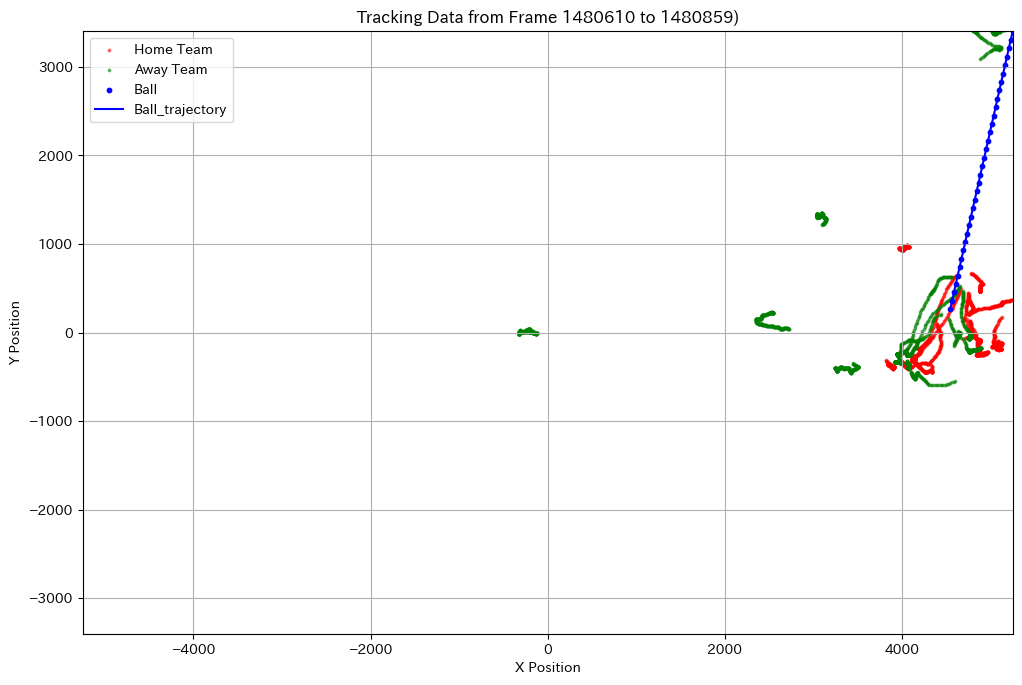

In [88]:
goal_frame = int(play_df.loc[play_df["F_ゴール"] == 1, "フレーム番号"].iloc[0])
fps = 25
buf_time = 10  # 秒
buf_frame = int(fps * buf_time)

cmap = {0: "b", 1: "r", 2: "g"}  # Ball  # Home team  # Away team
ha_dict = {0: "Ball", 1: "Home Team", 2: "Away Team"}

fig, ax = plt.subplots(figsize=(12, 12))

filtered_tracking_df = tracking_df[
    (tracking_df["Frame"] > goal_frame - buf_frame)
    & (tracking_df["Frame"] < goal_frame)
]

for ha, group_df in filtered_tracking_df.groupby("HA", sort=False):
    color = cmap.get(ha, "k")
    label = ha_dict.get(ha, f"Type {ha}")
    alplha = 0.5 if ha != 0 else 1.0
    if ha == 0:
        ax.scatter(
            group_df["X"], group_df["Y"], c=color, label=label, s=10, alpha=alplha
        )
        ax.plot(
            group_df["X"],
            group_df["Y"],
            c=color,
            label=f"{label}_trajectory",
            linewidth=1.5,
            alpha=alplha,
        )
    else:
        ax.scatter(
            group_df["X"], group_df["Y"], c=color, label=label, s=3, alpha=alplha
        )

plt.xlim(-5250.0, 5250.0)
plt.ylim(-3400.0, 3400.0)
plot_title_start_frame = (goal_frame - buf_frame) + 1
plot_title_end_frame = (goal_frame + buf_frame) - 1
plt.title(f"Tracking Data from Frame {plot_title_start_frame} to {goal_frame})")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.gca().set_aspect("equal")  # 縦横比を同じにする
plt.legend()
plt.show()